In [28]:
# Import thư viện 
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('data-mid-term.csv')
df

,FreeTime,StudyTime,Score,Sex,Result
0,0.50,1.50,2.50,M,0
1,0.75,0.75,2.00,F,0
2,1.00,1.00,2.50,L,0
3,1.25,1.25,2.75,G,0
4,1.50,4.00,3.50,B,0
...,...,...,...,...,...
495,1.80,9.00,2.50,T,1
496,4.30,5.50,0.00,M,1
497,0.80,4.50,1.80,F,0
498,0.00,0.80,3.30,L,1


Khoảng thời gian có xác suất cao nhất là từ 8.8 đến 9.200000000000001 giờ


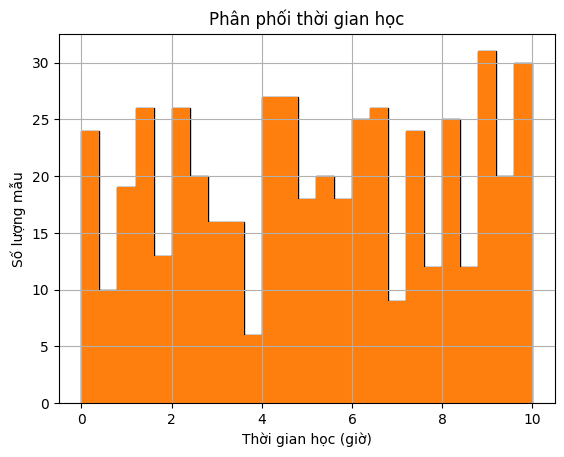

In [3]:
plt.hist(df['StudyTime'], bins=25, edgecolor='k')
plt.xlabel('Thời gian học (giờ)')
plt.ylabel('Số lượng mẫu')
plt.title('Phân phối thời gian học')
plt.grid(True)

# Xác định bin có tần suất cao nhất
bin_counts, bin_edges, _ = plt.hist(df['StudyTime'], bins=25)
max_bin_index = bin_counts.argmax()

# Xác định khoảng thời gian tương ứng với bin có tần suất cao nhất
start_time = bin_edges[max_bin_index]
end_time = bin_edges[max_bin_index + 1]

print(f"Khoảng thời gian có xác suất cao nhất là từ {start_time} đến {end_time} giờ")

plt.show()



In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Result ~ Sex', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

# ==> không phụ thuộc

,df,sum_sq,mean_sq,F,PR(>F)
Sex,5.0,1.194853,0.238971,0.963252,0.439828
Residual,494.0,122.555147,0.248087,NaN,NaN


Câu 13
dựa vào bảng thống kê mô tả hãy cho biết độ lớn của khoảng 50% số lượng sinh viên có giá trị điểm trung bình khóa học thông thường là bao nhiêu

In [5]:
mean = df['Score'].mean() # Giá trị trung bình (Mean) của SALES trước khi chuẩn hóa
std_dev = std_dev = df['Score'].std() # Độ lệch chuẩn (Standard Deviation) của SALES trước khi chuẩn hóa
z_score = mean/2 # Giá trị sau khi sử dụng Z-score scaler
print(std_dev)
print(mean)
range_size = 2 * z_score *std_dev  # Độ lớn của khoảng

print(f"Độ lớn của khoảng 50% số lượng sinh viên: {range_size} điểm")

1.5067051838438876
2.5559000000000003
Độ lớn của khoảng 50% số lượng sinh viên: 3.850987779386593 điểm


Câu 14

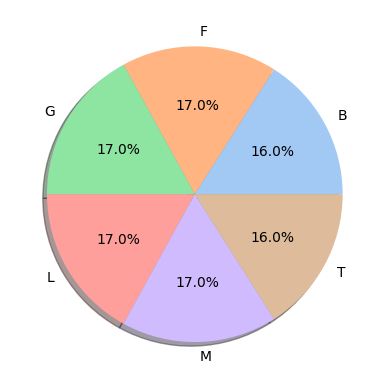

In [6]:
import seaborn as sns
gb = df.groupby(['Sex'])['Sex'].agg(['count'])

labels = gb.index
data = list(gb['count'])

colors = sns.color_palette('pastel')

plt.pie(data, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)

plt.show()


Dựa vào bảng thống kê mô tả hãy cho biết 75% số lượng sinh viên có giá trị điểm trung bình khóa học cao nhất là bao nhiêu

In [7]:
import scipy.stats as stats

# Giá trị phân vị (percentile) 75%
percentile = 0.75

# Tính giá trị Z-score tương ứng với phân vị 75%
z_score = stats.norm.ppf(percentile)

# Giá trị trung bình và độ lệch chuẩn từ bảng thống kê mô tả
mean = df['Score'].mean() # Giá trị trung bình (Mean) của SALES trước khi chuẩn hóa
std_dev = std_dev = df['Score'].std() # Độ lệch chuẩn (Standard Deviation) của SALES trước khi chuẩn hóa

# Tính giá trị điểm trung bình tương ứng với phân vị 75%
value = z_score * std_dev + mean

print(f"Giá trị điểm trung bình cao nhất cho 75% số lượng sinh viên: {value}")


Giá trị điểm trung bình cao nhất cho 75% số lượng sinh viên: 3.5721572030700055


In [8]:
import statsmodels.api as sm
import numpy as np

# Dữ liệu về thời gian dành cho việc riêng và thời gian dành cho việc học
freetime=df['FreeTime']
StudyTime=df['StudyTime']
Score=df['Score']
# Thêm cột hằng số cho mô hình
X = sm.add_constant(np.column_stack((freetime, StudyTime)))

# Tạo mô hình hồi quy tuyến tính OLS
model = sm.OLS(Score, X).fit()

# Lấy thông tin về R-squared
rsquared = model.rsquared

# In kết quả
print(f"R-squared: {rsquared * 100:.2f}%")

R-squared: 0.21%


In [9]:
# Hãy cho biết điểm LOGIC có phụ thuộc vào loại GT trên từng nhóm KV hay không
model = ols('Score ~ FreeTime + StudyTime + FreeTime:StudyTime',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
 
# Print the result
print(result)

# Logiv -> GT => p-value = 0.052 => accept H0 ->không phụ thuộc
# Logiv -> KV => p-value = 0.019 => reject H0 ->phụ thuộc
# Logiv -> GT:KV => p-value = 0.577 => accept H0 ->không phụ thuộc

                       df       sum_sq    mean_sq         F    PR(>F)
FreeTime              1.0     2.137750   2.137750  0.951710  0.329760
StudyTime             1.0     0.252584   0.252584  0.112448  0.737516
FreeTime:StudyTime    1.0    16.294400  16.294400  7.254141  0.007313
Residual            496.0  1114.125361   2.246220       NaN       NaN


In [10]:
average_time_by_sexual_orientation = df.groupby(['Sex','Result'])['Score'].mean()
print(average_time_by_sexual_orientation)


Sex  Result
B    0         2.280000
     1         2.550000
F    0         2.617778
     1         2.675000
G    0         2.246250
     1         2.580000
L    0         2.820000
     1         2.595556
M    0         2.754286
     1         2.753000
T    0         2.521667
     1         2.267000
Name: Score, dtype: float64


In [11]:
average_all_students = df['Score'].mean()

# Sử dụng groupby để tính điểm trung bình cho từng nhóm xu hướng tình dục
average_by_sexual_orientation = df.groupby('Sex')['Score'].mean()

# So sánh điểm trung bình của từng nhóm với điểm trung bình của tất cả sinh viên
groups_higher_than_average = average_by_sexual_orientation[average_by_sexual_orientation > average_all_students]

# In ra những nhóm có điểm trung bình cao hơn
print(groups_higher_than_average)

Sex
F    2.644706
L    2.701176
M    2.753529
Name: Score, dtype: float64


In [12]:
df.shape

(500, 5)

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols ('Score ~ Sex', data=df).fit()
result = sm.stats.anova_lm(model, type = 2)

print(result)
# ==> không phụ thuộc độc lập

             df       sum_sq   mean_sq        F    PR(>F)
Sex         5.0    11.509670  2.301934  1.01414  0.408585
Residual  494.0  1121.300425  2.269839      NaN       NaN


In [14]:
#22 đếm sinh viên điêm cao nhất
highest_score = df['Score'].max()

# Đếm số lượng sinh viên có điểm bằng điểm cao nhất
num_students_highest_score = df[df['Score'] == highest_score].count()

print("Số lượng sinh viên đạt điểm cao nhất:", num_students_highest_score)

Số lượng sinh viên đạt điểm cao nhất: FreeTime     26
StudyTime    26
Score        26
Sex          26
Result       26
dtype: int64


In [15]:
model = ols('Score ~ FreeTime + StudyTime + FreeTime:StudyTime',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
 
# Print the result
print(result)

# ==> tương quan

                       df       sum_sq    mean_sq         F    PR(>F)
FreeTime              1.0     2.137750   2.137750  0.951710  0.329760
StudyTime             1.0     0.252584   0.252584  0.112448  0.737516
FreeTime:StudyTime    1.0    16.294400  16.294400  7.254141  0.007313
Residual            496.0  1114.125361   2.246220       NaN       NaN


In [ ]:
# so sánh kurtosis

In [16]:
df[['StudyTime']].kurtosis()


StudyTime   -1.179135
dtype: float64

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

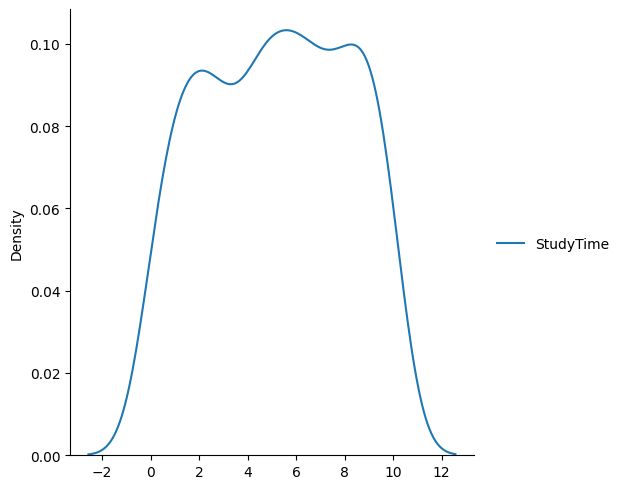

In [19]:
sns.displot(data=df[['StudyTime']],kind='kde')
plt.show()

In [25]:
#khoảng nghi ngờ
data=df['Score']
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Xác định khoảng dữ liệu nghi ngờ bất thường
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print("Khoảng dữ liệu nghi ngờ bất thường (Suspicious Outlier Range):")
print(f"Giá trị dưới ngưỡng: {lower_threshold}")
print(f"Giá trị trên ngưỡng: {upper_threshold}")






Khoảng dữ liệu nghi ngờ bất thường (Suspicious Outlier Range):
Giá trị dưới ngưỡng: -2.750000000000001
Giá trị trên ngưỡng: 8.05
1.3
4.0


lower bound =  -2.750000000000001
upper bound =  8.05
IQR 2.7
ngoai bien dưới -2.4250000000000007
ngoai bien tren 10.675


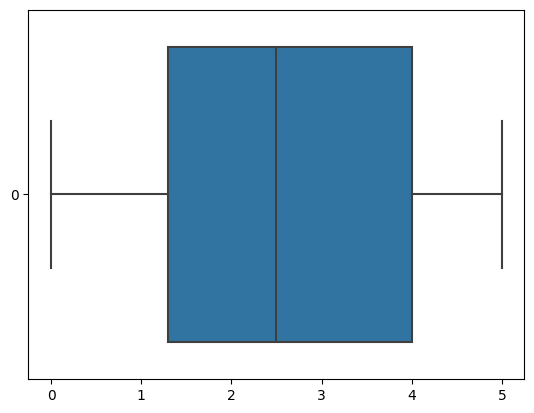

In [26]:
sns.boxplot(data=df['Score'],orient="h")
print('lower bound = ', df['Score'].quantile(0.25) - 1.5*(df['Score'].quantile(0.75) -
df['Score'].quantile(0.25)))
print('upper bound = ', df['Score'].quantile(0.75) + 1.5*(df['Score'].quantile(0.75) -
df['Score'].quantile(0.25)))
IQR = df['Score'].quantile(0.75) - df['Score'].quantile(0.25)
print('IQR',IQR)
print('ngoai bien dưới', 1.625 -1.5*IQR)
print('ngoai bien tren', 6.625 +1.5*IQR)


In [33]:
# mô hình hồi quy tuyến tính
from sklearn import linear_model
data=df[['FreeTime','StudyTime','Score']]
df = pd.DataFrame(data)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Xác định biến độc lập và biến phụ thuộc
X = df[['FreeTime', 'StudyTime']]
y = df['Score']

# Khớp mô hình với dữ liệu
model.fit(X, y)

# In ra các tham số hồi quy
print("Hệ số góc (slope) cho ThoiGianNghi:", model.coef_[0])
print("Hệ số góc (slope) cho ThoiGianHoc:", model.coef_[1])
print("Hệ số giao (intercept):", model.intercept_)

Hệ số góc (slope) cho ThoiGianNghi: -0.02130679484671954
Hệ số góc (slope) cho ThoiGianHoc: -0.007618853646361461
Hệ số giao (intercept): 2.7059652695340413


In [34]:
tong=-0.02130679484671954*7-0.007618853646361461*5+2.7059652695340413
tong


2.518723437375197

In [35]:
#bằng chứng 
pearson_coef, p_value = stats.pearsonr(df['StudyTime'], df['Score'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.01803162411355623  with a P-value of P = 0.687519978776968


In [ ]:

# <ul>
#     <li>giá trị p là $<$ 0,001: chúng tôi cho rằng có bằng chứng chắc chắn rằng mối tương quan là đáng kể.</li>
#     <li>giá trị p là $<$ 0,05: có bằng chứng vừa phải cho thấy mối tương quan là đáng kể.</li>
#     <li>giá trị p là $<$ 0,1: có bằng chứng yếu cho thấy mối tương quan là đáng kể.</li>
#     <li>giá trị p là $>$ 0,1: không có bằng chứng nào cho thấy mối tương quan là đáng kể.</li>
# </ul>